In [77]:
_
#!pip install history

In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.optimizers import adam_v2
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [79]:
forest=pd.read_csv(r"C:\Users\AJAY\Downloads\forestfires.csv")

In [80]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [81]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [82]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
forest.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:>

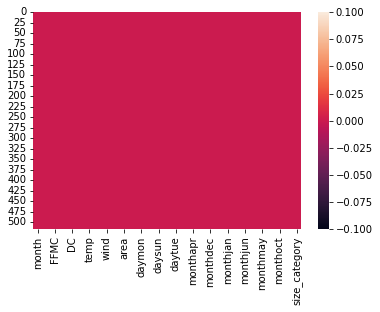

In [84]:
sns.heatmap(forest.isna())

In [85]:
Le=LabelEncoder()
forest2["month"]=Le.fit_transform(forest2["month"])

forest2["day"]=Le.fit_transform(forest2["day"])

forest2["size_category"]=Le.fit_transform(forest2["size_category"])
forest2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


<AxesSubplot:xlabel='month', ylabel='FFMC'>

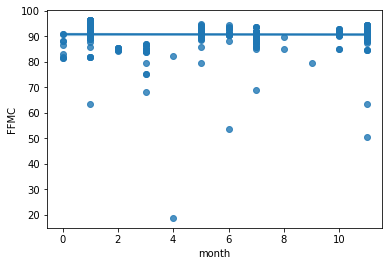

In [96]:
sns.regplot('month','FFMC',data=forest2)

<AxesSubplot:>

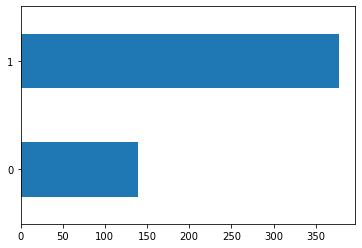

In [97]:
forest2.size_category.value_counts(ascending=True).plot(kind='barh')

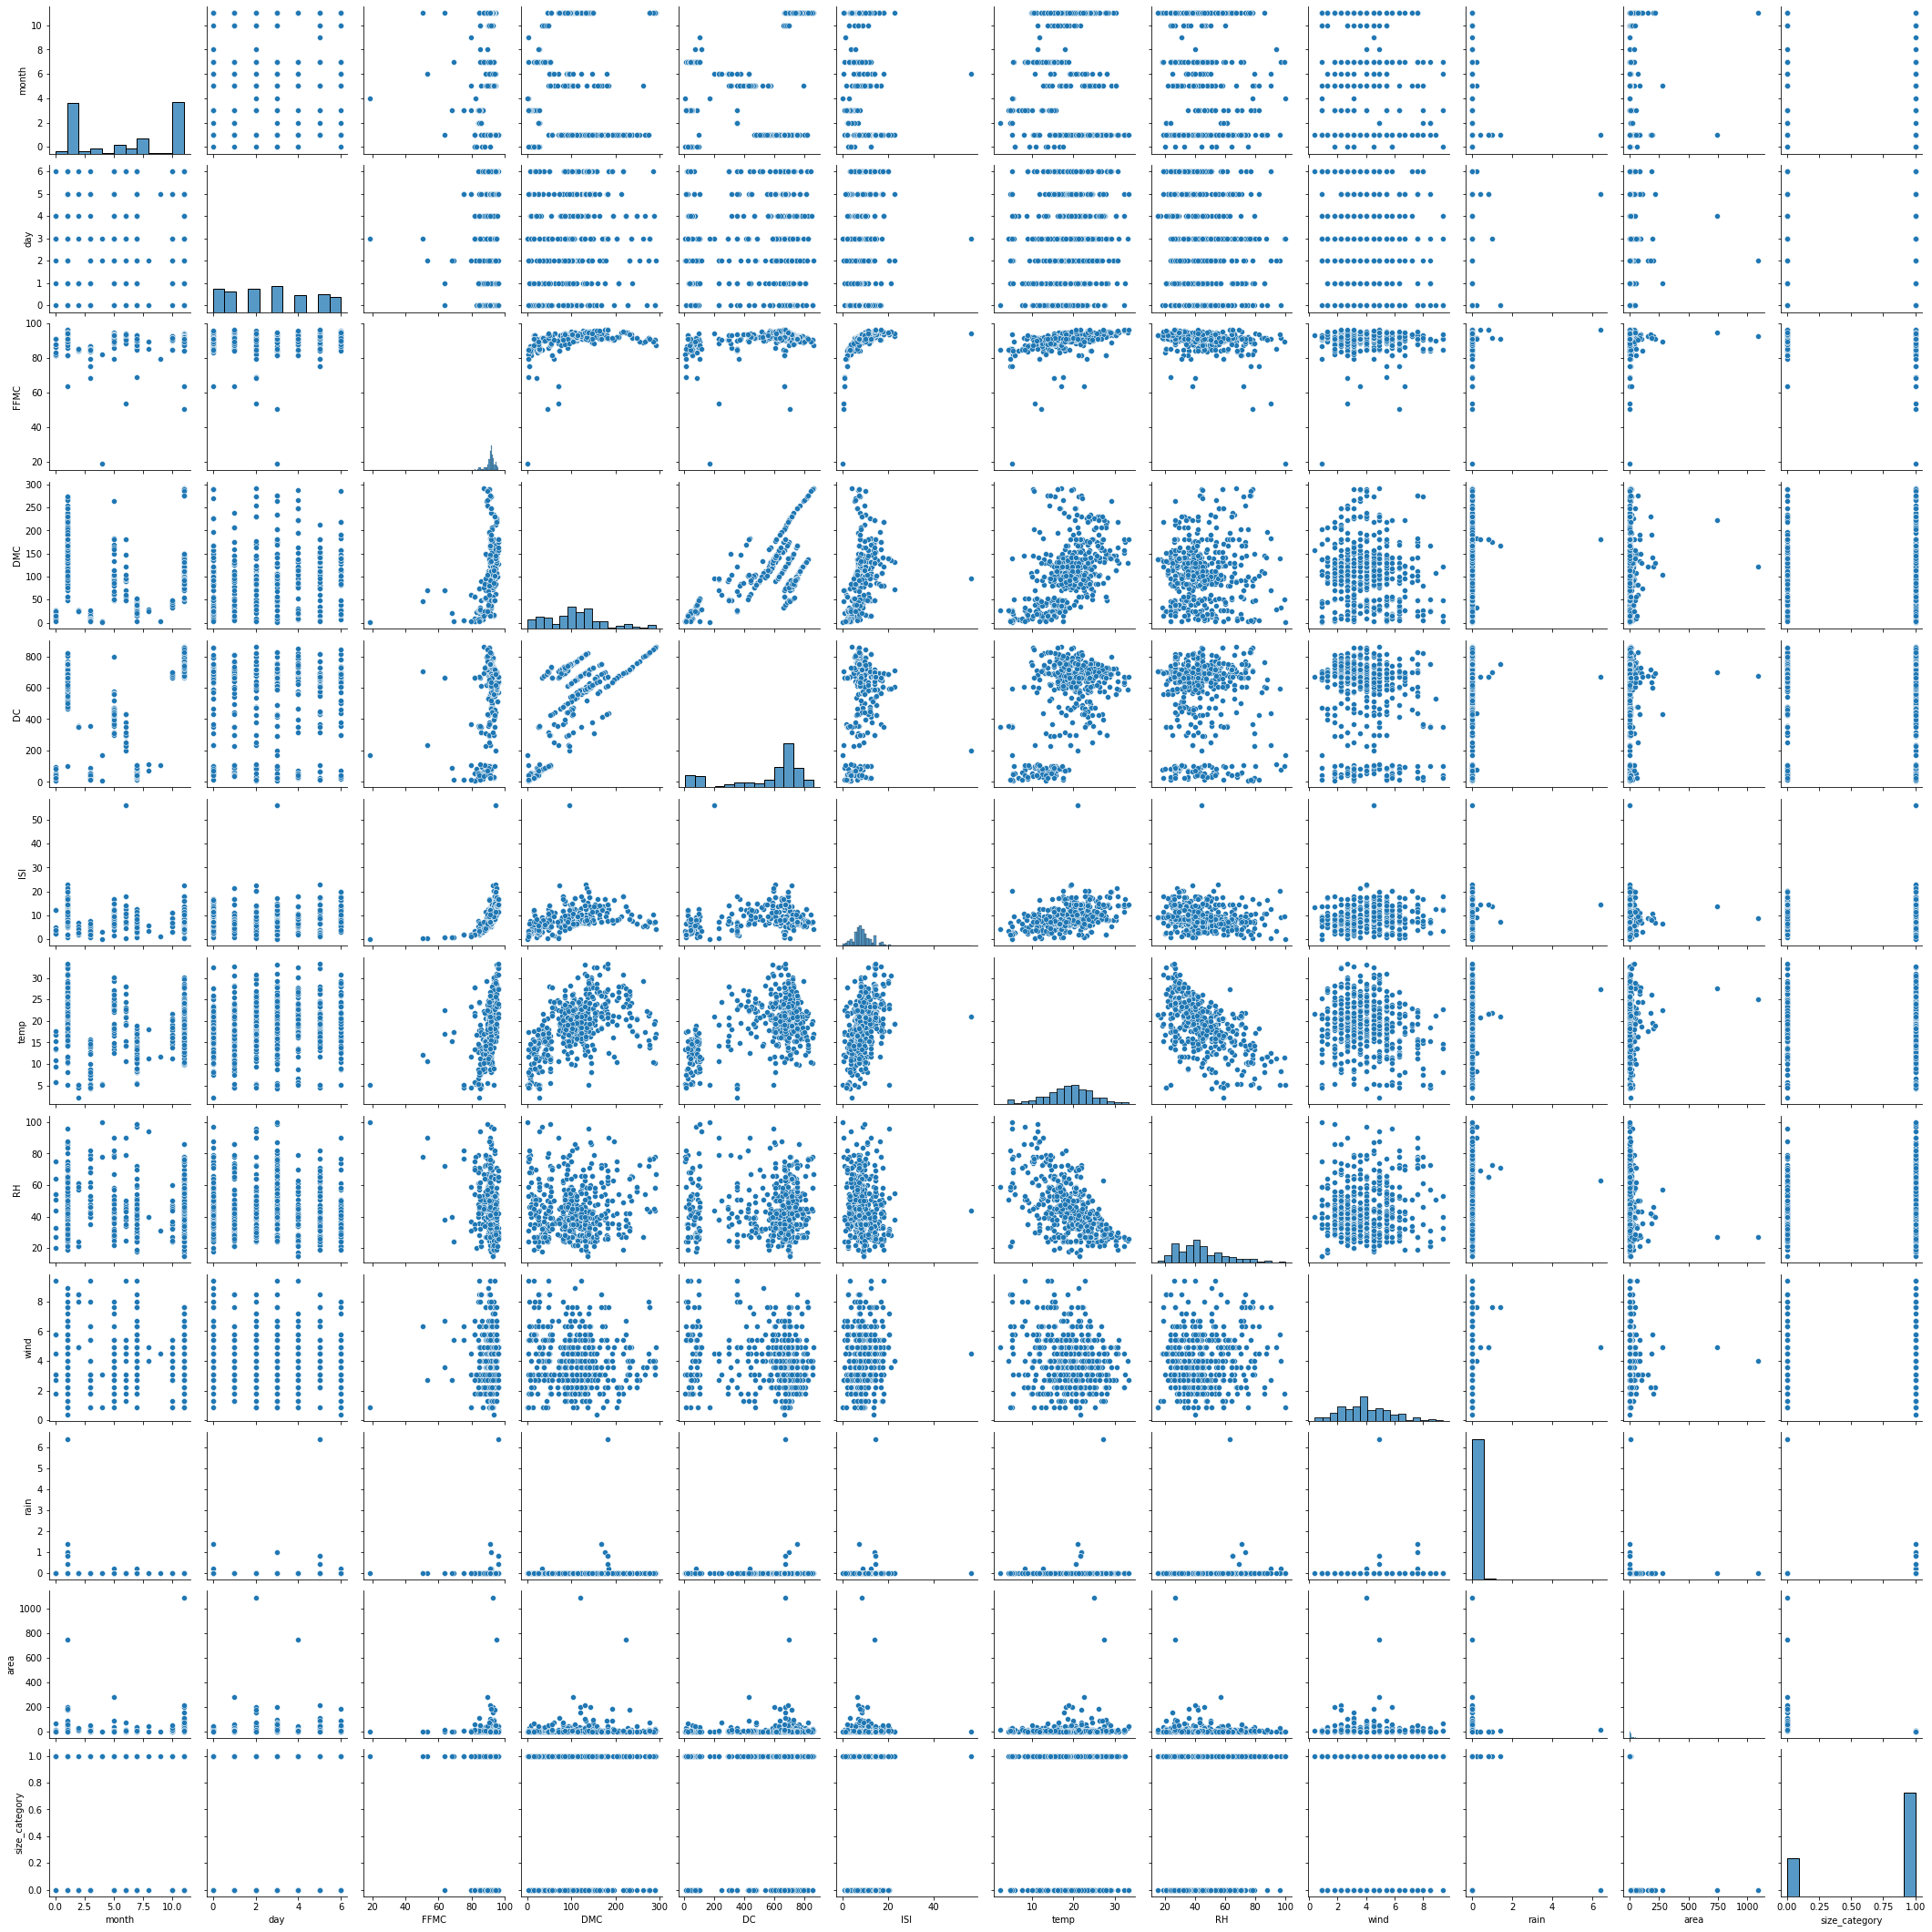

In [98]:
sns.pairplot(forest2)

<AxesSubplot:>

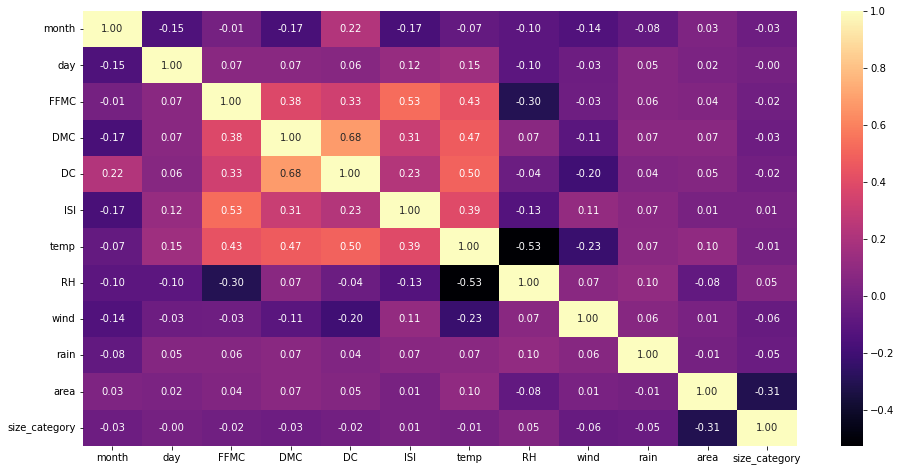

In [99]:
plt.figure(figsize=(16,8));
sns.heatmap(forest2.corr(),cmap='magma',annot=True,fmt=".2f")

In [86]:
x=forest2.iloc[:,0:11]
y=forest2.iloc[:,-1]


In [87]:
model = Sequential()
model.add(Dense(16, input_dim=11,  activation='relu')) 
model.add(Dense(20,  activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 

In [88]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [89]:
history = model.fit(x, y, validation_split=0.40, epochs=250, batch_size=10)


Epoch 1/250
31/31 [==============================] - 1s 6ms/step - loss: 20.4087 - accuracy: 0.7452 - val_loss: 5.2442 - val_accuracy: 0.6908
Epoch 2/250
31/31 [==============================] - 0s 2ms/step - loss: 2.2532 - accuracy: 0.6194 - val_loss: 3.4703 - val_accuracy: 0.5217
Epoch 3/250
31/31 [==============================] - 0s 2ms/step - loss: 1.4365 - accuracy: 0.6871 - val_loss: 2.4126 - val_accuracy: 0.5556
Epoch 4/250
31/31 [==============================] - 0s 2ms/step - loss: 0.9229 - accuracy: 0.7484 - val_loss: 1.5339 - val_accuracy: 0.6425
Epoch 5/250
31/31 [==============================] - 0s 2ms/step - loss: 0.9071 - accuracy: 0.7742 - val_loss: 0.8718 - val_accuracy: 0.7874
Epoch 6/250
31/31 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.8032 - val_loss: 0.7123 - val_accuracy: 0.7246
Epoch 7/250
31/31 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8355 - val_loss: 0.5565 - val_accuracy: 0.7971
Epoch 8/250


In [90]:
scores=model.evaluate(x,y)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 815us/step - loss: 0.0391 - accuracy: 0.9807
accuracy: 98.07%


In [94]:
model.metrics_names

['loss', 'accuracy']

In [95]:
scores

[0.03905672952532768, 0.9806576371192932]

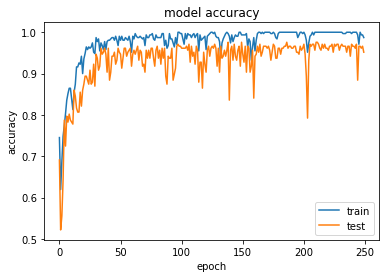

In [92]:

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()


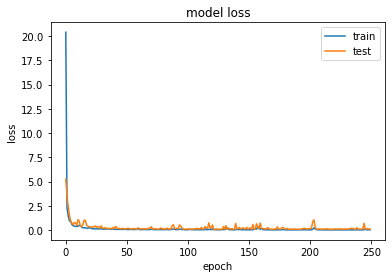

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()